# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display



## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [45]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [46]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

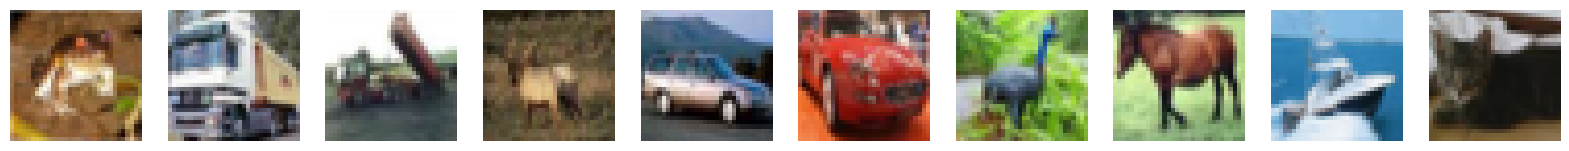

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [47]:
display(x_train[:10])
print(y_train[:10])
print(y_train)

## 2. Build the model <a name="build"></a>

In [48]:
input_layer = layers.Input((32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model = models.Model(input_layer, output_layer)

#print(model.summary())

#model = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
#    tf.keras.layers.Dense(200, activation="relu"),
#    tf.keras.layers.Dense(150, activation="relu"),
#    tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")
#])

print(model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_63 (Dense)            (None, 200)               614600    
                                                                 
 dense_64 (Dense)            (None, 150)               30150     
                                                                 
 dense_65 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## 3. Train the model <a name="train"></a>

In [49]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [50]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8460 - accuracy: 0.3333
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6617 - accuracy: 0.4050
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5893 - accuracy: 0.4334
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5406 - accuracy: 0.4518
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5066 - accuracy: 0.4625
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4763 - accuracy: 0.4727
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4491 - accuracy: 0.4823
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4271 - accuracy: 0.4902
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4078 - accuracy: 0.4971
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.390

## 4. Evaluation <a name="evaluate"></a>

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 474us/step - loss: 1.4347 - accuracy: 0.4845


[1.4347267150878906, 0.484499990940094]

In [52]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 444us/step


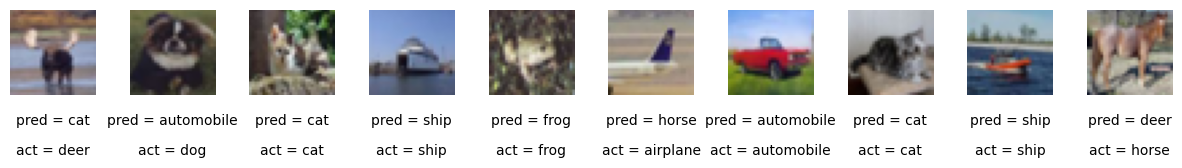

In [53]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)